# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

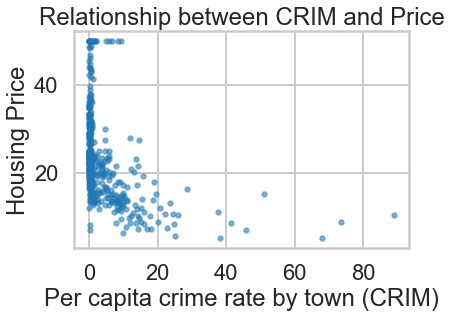

In [12]:
plt.scatter(bos.CRIM, bos.PRICE, s=20, alpha=0.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# <font color="blue">your turn: describe relationship</font>
There's definitely generally an inverse (negative) relationship between housing price and per captia crime rate by town but it's definitely not linear

Can't really tell but but doesn't seem to be completely linear because there are outliers:
    * generally housing prices can be high when per capita crime rate is low
    * however, there are definitly housing prices that are now but has low per capita crime rate - there are some housing prices that are higher with per captia rate of up to 10 percent (reverse L shape of the graph on the upper left)
    * there is a cluster of data points at the bottom left where it seems to suggest that housing price is low even though the crime rate is low
    
   




Text(0.5, 1.0, 'Relationship between RM and Price')

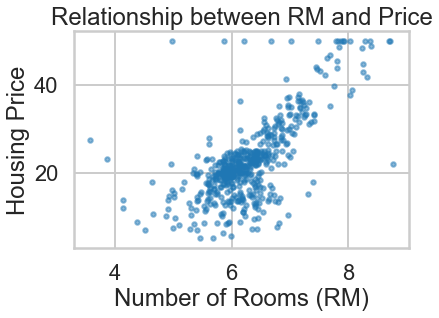

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=20, alpha=0.5)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

# Relationship

This looks more linear - number of rooms has a positive linear relationship to housing prices.

However, there are definitely outlier with the dots along the top of the graph and the couple dots on the left and right of the graph

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

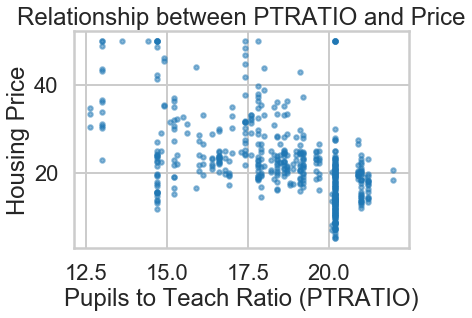

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=20, alpha=0.5)
plt.xlabel("Pupils to Teach Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

# relationship

This is definitely NOT linear. If it is there may be a line that seems to suggest inverse (negative relationship) between the two

However, I hesitate to say that it's linear because of the number of outliers on the graph

Text(0.5, 1.0, 'Relationship between INDUS and Price')

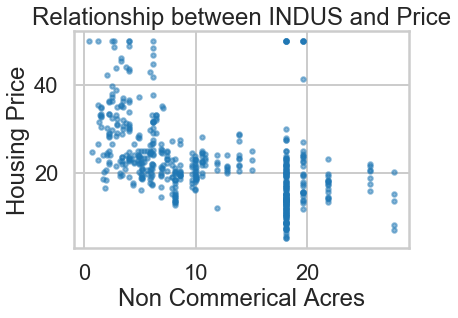

In [15]:
# your turn: create some other scatter plots - 
plt.scatter(bos.INDUS, bos.PRICE, s=20, alpha=0.5)
plt.xlabel("Non Commerical Acres")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

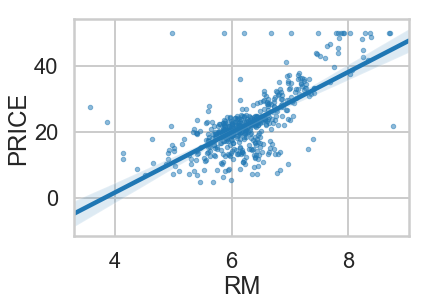

In [16]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, scatter_kws={'s':20, 'alpha':0.5})

### Histograms
***


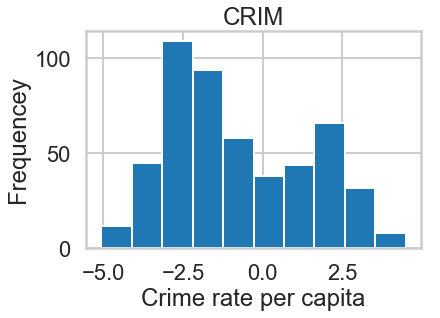

In [17]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

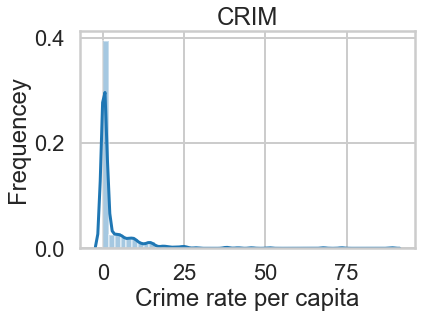

In [18]:
#your turn
sns.distplot(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

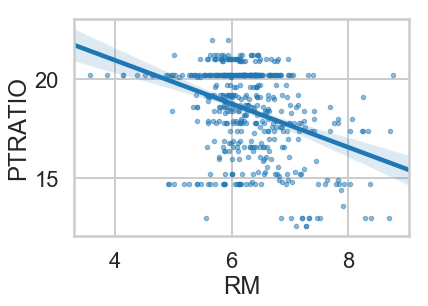

In [19]:
sns.regplot(data=bos, x="RM", y="PTRATIO", fit_reg=True, scatter_kws={'s':20, 'alpha':0.5})

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [20]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 09 May 2019   Prob (F-statistic):           2.49e-74
Time:                        22:07:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

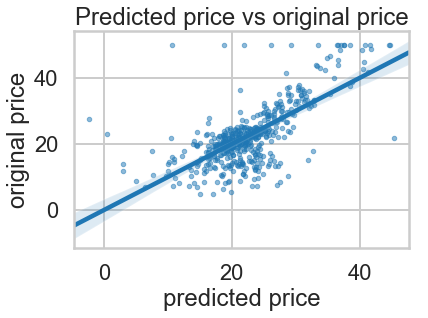

In [22]:
# your turn
sns.regplot(m.fittedvalues, bos.PRICE, scatter_kws={'s':20, 'alpha':0.5})
plt.title("Predicted price vs original price")
plt.ylabel("original price")
plt.xlabel("predicted price")
plt.show()


# definitely looks linear however if it's a good predictor I would expect the x and y
# intercepts to be at 0. Also we are seeing some outliers along the top of the graph
# as well as some on the left and right side of the graph

### Fitting Linear Regression using `sklearn`


In [23]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [24]:
# Look inside lm object
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [25]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


# <font color="blue"> Answers
here is what you call if you don't fit the intercept
  ```
    lm2 = LinearRegression(fit_intercept=False)
    lm2.fit(X, bos.PRICE)
   ```

Would you recommend not having an intercept? Why or why not? 

would probably not recommend this since there is probably a point of entry in price - ie, it would not make
sense for a house to cost $0. There is probably a minimum price that houses list at regardless of other variables
that we are considering

One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? 

probably not enough for something to be normally distributed. However if it was standard normal that's a
different story. my guess is that if it's normally distributed, depending on the mean and standard variance 
the difference between y and y-hat can always be positive which would just mean that your estimate is always above the real price. Whereas if you have standard normal then the difference will range between negative number and positive number which should even out as you add them

True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

False - Y probably does not need to be normally distributed. Y is the outcome - this depends on the input - 
being normally distributed just emans that Y follows a bell curve in terms of distribution of value. For normal
distribution, that would mean that training data for Y (price) would have a cluster of data points in the center.
It would be a better prediction model if you had Y was evenly distributed so you have data points for linear
regression all throughout your graph to calculate your loss function

</font>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [26]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [27]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [28]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [29]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [30]:
#  predicted prices
predicted_prices = lm.predict(X)
print("Predicted Price Stats")
print(pd.Series(predicted_prices).describe())

Predicted Price Stats
count    506.000000
mean      22.532806
std        7.915083
min       -4.281311
25%       17.445740
50%       22.118653
75%       27.410022
max       44.673083
dtype: float64


In [31]:
# real price stats
print(pd.Series(boston.target).describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64


In [32]:
df = pd.DataFrame({"true_price":boston.target, "predicted_price":predicted_prices})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
true_price         506 non-null float64
predicted_price    506 non-null float64
dtypes: float64(2)
memory usage: 8.0 KB


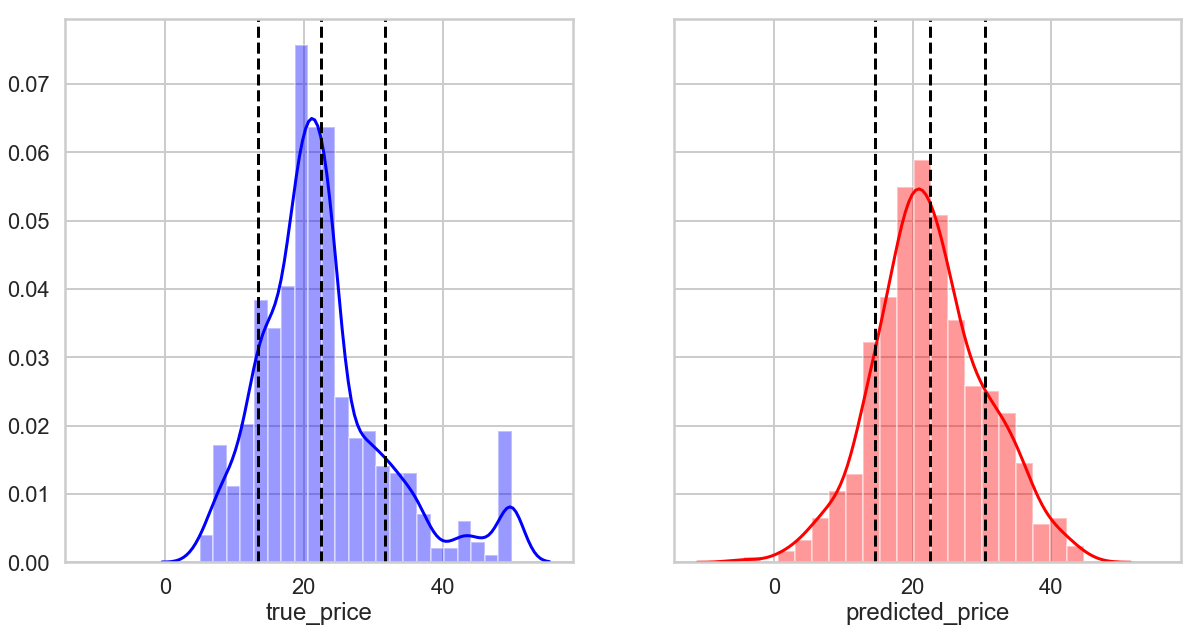

In [33]:
# plot histogram for both side by side
f, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,10))
sns.distplot(df.true_price, color="blue", label="True Price", ax=axes[0])
axes[0].axvline(df.true_price.mean() - df.true_price.std(), color="k", linestyle="--")
axes[0].axvline(df.true_price.mean(), color="k", linestyle="--")
axes[0].axvline(df.true_price.mean() + df.true_price.std(), color="k", linestyle="--")
sns.distplot(df.predicted_price, color="red", label="Predicted Price", ax=axes[1])
axes[1].axvline(df.predicted_price.mean() - df.predicted_price.std(), color="k", linestyle="--")
axes[1].axvline(df.predicted_price.mean(), color="k", linestyle="--")
axes[1].axvline(df.predicted_price.mean() + df.predicted_price.std(), color="k", linestyle="--")


## <font color="blue">Analysis
* distribution of prices look pretty normal with mean around at 22.5 - not quite standard normal distribution as variance is not 1 and it's not centered around 0 - not sure how to explain this but from the input graphs that we saw before, we definitely see concentrated clusters in the middle of the graphs which would translate to cluster of output around the mean and standard deviation of the graph with slightly more predicted prices around the right of the mean. And there are outliers at the right end of the actual price histogram where we see high probability of those prices come up that are not in the predicted model
* the mean of the two graphs are approximately the same
* However, the real price histogram shows the real price skews more to the right than the predicted prices
* also our predicted price tends to be lower than the real price
    </font>


# <font color="red">Questions</font>
* Not entirely sure if this means I'm using all parameters to fit the model. I plotted m before and it looks identical to m_all. 
* Regarding outliers at the high price point of the histogram - not sure what we should do with them

In [34]:
# use OLS to fit all parameters
m_all = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 09 May 2019   Prob (F-statistic):          6.72e-135
Time:                        22:07:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

# <font color="blue">OLS coefficients came out to the identical to sklearn </font>

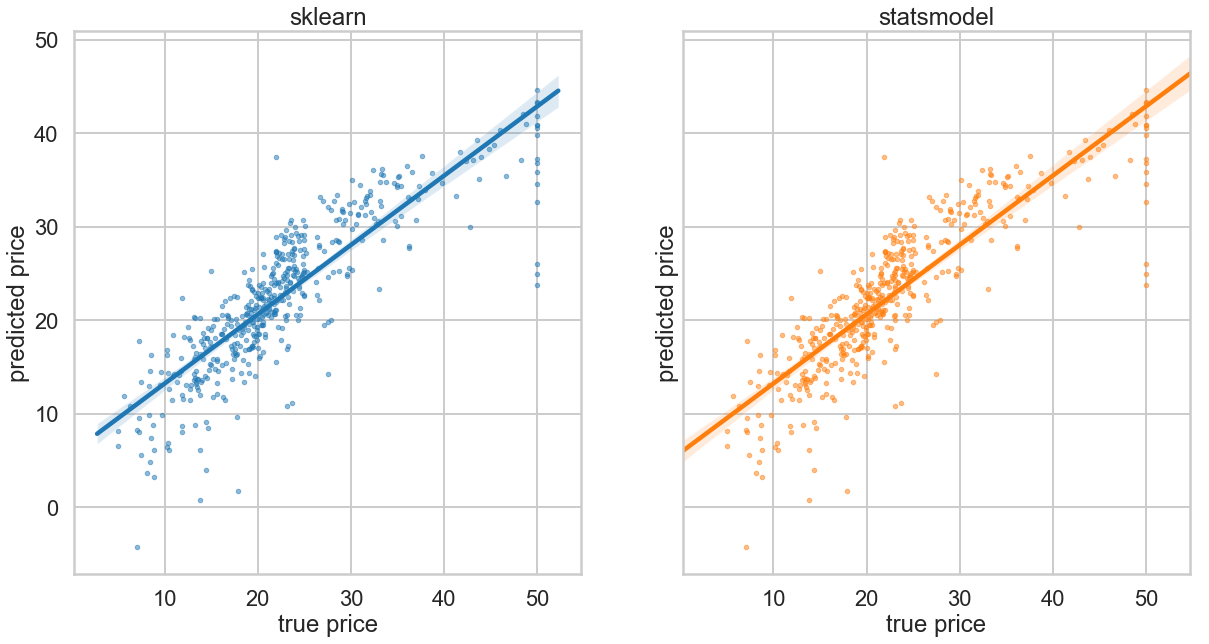

In [35]:
# Scatterplot true prices compared to predicted prices - this should look like straight line
f, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,10))
df = pd.DataFrame({"true_price": boston.target, "predicted_price": predicted_prices})[["true_price", "predicted_price"]]
sns.regplot(data=df, x="true_price", y="predicted_price", scatter_kws={'s':20, 'alpha':0.5}, ax=axes[0])
axes[0].set_title("sklearn")
axes[0].set_ylabel("predicted price")
axes[0].set_xlabel("true price")

sns.regplot(bos.PRICE, m_all.fittedvalues, scatter_kws={'s':20, 'alpha':0.5}, ax=axes[1])
axes[1].set_title("statsmodel")
axes[1].set_ylabel("predicted price")
axes[1].set_xlabel("true price")
plt.show()


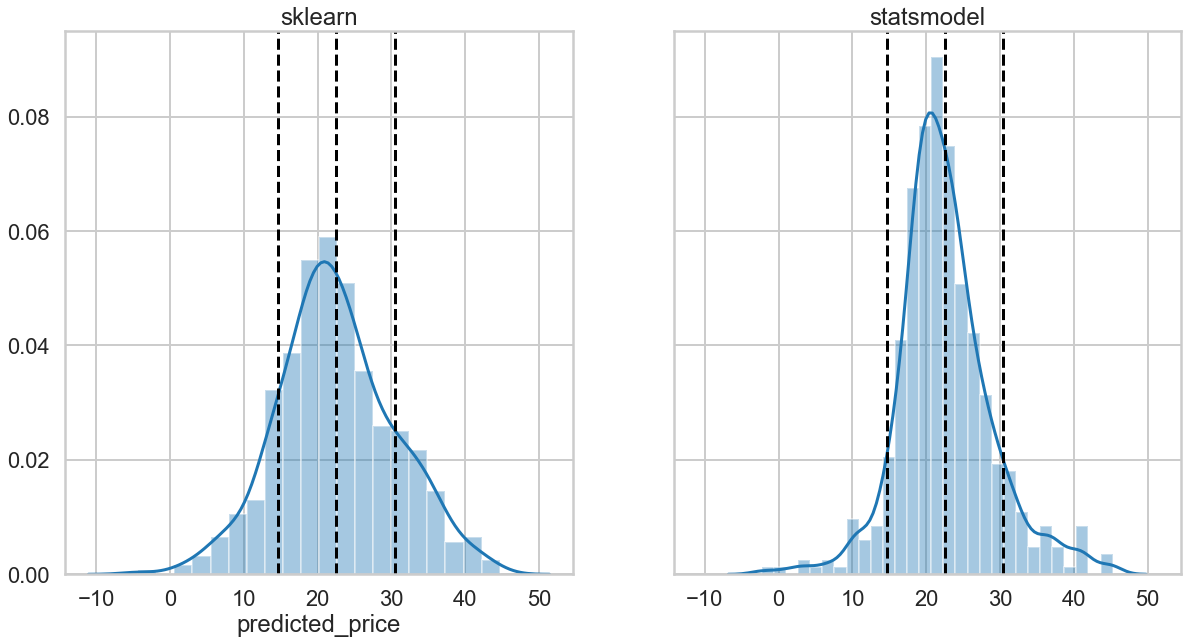

In [36]:
# histogram comparison between sklearn and statsmodel
f, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,10))
sns.distplot(df.predicted_price,  ax=axes[0])
axes[0].set_title("sklearn")
axes[0].axvline(df.predicted_price.mean() - df.predicted_price.std(), color="k", linestyle="--")
axes[0].axvline(df.predicted_price.mean(), color="k", linestyle="--")
axes[0].axvline(df.predicted_price.mean() + df.predicted_price.std(), color="k", linestyle="--")

sns.distplot(m.fittedvalues,  ax=axes[1])
axes[1].set_title("statsmodel")
axes[1].axvline(m_all.fittedvalues.mean() - m_all.fittedvalues.std(), color="k", linestyle="--")
axes[1].axvline(m_all.fittedvalues.mean(), color="k", linestyle="--")
axes[1].axvline(m_all.fittedvalues.mean() + m_all.fittedvalues.std(), color="k", linestyle="--")


# <font color="blue"> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</font>
    
* Hmm.. the results here are identical in terms of the model. sklearn has the parameter where you can determine if you want to fit the intercept to 0 which would make sense in this context. Statsmodel seems to have more information regarding the fitted model using the summary() command
* statsmodel seems to calculate more statistics for you using the RegressionResults object - ie, p-values, covariance matrixes, R^2, residuals, etc

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [37]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [38]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [39]:
def calculate_ESS(predicted, actual):
    return np.sum((predicted - actual.mean()) ** 2)
def calculate_RSS(predicted, actual):
    return np.sum((actual - predicted) ** 2)
def calculate_TSS(predicted, actual):
    return calculate_ESS(predicted, actual) + calculate_RSS(predicted, actual)
def calculate_R2(predicted, actual):
    return calculate_ESS(predicted, actual) / calculate_TSS(predicted, actual)
def calculate_F(r2, observations, coefficients):
    return (r2 / (1 - r2)) * (observations - coefficients - 1) / coefficients

In [40]:
# linear regression model using only PTRATIO
X_ptratio = pd.DataFrame(bos["PTRATIO"])
print(X_ptratio.shape)
lm_ptratio = LinearRegression()
lm_ptratio.fit(X_ptratio, bos.PRICE)
Y_ptratio = lm_ptratio.predict(X_ptratio)

(506, 1)


In [41]:
# check that my functions return the same thing
ESS = np.sum((Y_ptratio - bos.PRICE.mean()) ** 2)
RSS = np.sum((bos.PRICE - Y_ptratio) ** 2)
R_2_1 = ESS / (RSS + ESS)
print(R_2_1)
print(calculate_R2(Y_ptratio, bos.PRICE))
print(lm_ptratio.score(X_ptratio, bos.PRICE))

0.257847318009223
0.257847318009223
0.257847318009223


In [42]:
# coefficient for PTRATION from sklearn
lm_ptratio.coef_

array([-2.1571753])

In [43]:
F_1 = calculate_F(R_2_1, len(bos.PRICE), len(lm_ptratio.coef_))
F_1


175.10554287569548

In [44]:
# use statsmodel
m_ptratio = ols("PRICE ~ PTRATIO", bos).fit()
m_ptratio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.61e-34
Time:                        22:07:51   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color="blue">Analysis</font>
* <b>Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</b>
    * interecept is at 62.3446 - this is the x intercept of the line, indicating the minimum price if our variables are all 0
    * PTRATIO parameter value is -2.1572. This means that as pupil-teacher ratio increases, there is a decrease effect on housing price by a factor os -2.1572. 
    * PTRATIO also has a confidence interval of -2.477 to -1.837 - this means that there is 95% confidence that per unit increase in PTRATIO, the decrease in housing price is anywhere between 2477 to 1837
    * p-value of PTRATIO is at 0 - since this is small and < 5% this means that the relationship between housing price and PTRATIO is statistically significant and changes housing prices cause by PTRATIO under null-hypotesis is very low - meaning that change in housing prices caused by PTRATIO is not likely to be due to chance


* <b>Exercise: Calculate (or extract) the  𝑅2  value. What does it tell you?</b>
    * ${R^2}$ is 0.258 - this indicates that PTRATIO only accounts for around 25% of the variance and variation in housing prices



* <b>Exercise: Compute the  𝐹 -statistic. What does it tell you?</b>
* F-stat is 175. This by itself does not tell us anything unless we compare it to other models. If we use all 13 variables, this number if higher than if we use 13 variables. However exponent for p-value is -34 compared to -135 for 15 variables meaning that our chance of null hypothesis is very high compared to using 13 variables. Both are staistically significant


* <b>Exercise: Take a close look at the  𝐹 -statistic and the  𝑡 -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</b>
* F-statistic is at 175.1, t-stat is -13.233 0 both look to be pretty big numbers but different signs


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [45]:
m3 = ols("PRICE ~ CRIM + RM + PTRATIO", bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 09 May 2019   Prob (F-statistic):           6.15e-98
Time:                        22:07:51   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color="blue">Analysis</font>
* <b>Exercise: Compute or extract the  𝐹 -statistic. What does it tell you about the model?</b>
    * F-statistic increased from 175 to 245.2 - this is larger than if we only use PTRATIO. Exponent of p-value for F-statistic also decreased form -34 to -98 mean that chance of null hypothesis is decreasing

* <b>Exercise: Compute or extract the  𝑅2  statistic. What does it tell you about the model?</b>
    * ${R^2}$ is now at 0.594. This means that the 3 variables combined now accounts for around 60% of the changes in housing prices. Improvement from just using PTRATIO

* <b>Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</b>
    * CRIM coefficient - -0.2050 - pretty small number but there is an inverse relationship between crime rate as housing prices. ie, increase crime = decrease housing prices which makes sense. Per increase in crime rate per capita, we would expect an average of 205 decrease in housing prices. With 95% confidence interval, we would expect housing prices to drop between 268 to 142 per increase in CRIM. p-value for this is close to 0 which means affect on housing prices is not due to chance
    * RM - 7.3804 - per room increase, this explains that housing prices is expected to increase on average around 7380. 95% of the time, the value will be between 6592 and 8169. p-value is 0 or close to 0 which means change in housing prices cased by RM is not due to chance
    * PTRATIO - -1.0695 - this has decreased from - -2.1572 - this means that per change in pupil-teacher ratio, the effect of housing prices decrease is now less that the effect in the model that we saw with only PTRATIO. p-value for this is sill at 0 which means changes statistically significant and is not due to chance. Also, means that part of the change we saw caused by PTRATIO with one variable is now being explained by one of the other two new variables 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [46]:
# your turn
# adding ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# adding AGE - proportion of owner-occupied units built prior to 1940
m5 = ols("PRICE ~ CRIM + RM + PTRATIO + ZN + AGE", bos).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 09 May 2019   Prob (F-statistic):           2.28e-99
Time:                        22:07:51   Log-Likelihood:                -1603.0
No. Observations:                 506   AIC:                             3218.
Df Residuals:                     500   BIC:                             3243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2813      4.119     -0.068      0.946      -8.375       7.812
CRIM          -0.1644      0.033     -4.981      0.000      -0.229      -0.100
RM             7.1774      0.403     17.813      0.000       6.386       7.969
PTRATIO       -1.0084      0.137     -7.367      0.000      -1.277      -0.739
ZN            -0.0046      0.014     -0.320      0.749      -0.033       0.023
AGE           -0.0443      0.012     -3.798      0.000      -0.067      -0.021
==============================================================================
Omnibus:                      278.328   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2938.502
Skew:                           2.183   Prob(JB):                         0.00
Kurtosis:                      13.969   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Doc for variables
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population

In [47]:
# F-statistics comparing 5 to all variables (13)
m_all = ols("PRICE ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", bos).fit()
print(m5.summary())
m_all.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 09 May 2019   Prob (F-statistic):           2.28e-99
Time:                        22:07:51   Log-Likelihood:                -1603.0
No. Observations:                 506   AIC:                             3218.
Df Residuals:                     500   BIC:                             3243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2813      4.119     -0.068      0.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 09 May 2019   Prob (F-statistic):          1.23e-133
Time:                        22:07:51   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3797      5.143      6.879      0.000      25.274      45.485
ZN             0.0425      0.014      3.077      0.002       0.015       0.070
INDUS          0.0281      0.062      0.452      0.651      -0.094       0.150
CHAS           2.8284      0.869      3.255      0.001       1.121       4.536
NOX          -17.0182      3.851     -4.420      0.000     -24.584      -9.452
RM             3.8460      0.422      9.116      0.000       3.017       4.675
AGE            0.0005      0.013      0.041      0.967      -0.026       0.027
DIS           -1.3990      0.200     -6.993      0.000      -1.792      -1.006
RAD            0.2478      0.065      3.838      0.000       0.121       0.375
TAX           -0.0122      0.004     -3.210      0.001      -0.020      -0.005
PTRATIO       -0.9437      0.132     -7.145      0.000      -1.203      -0.684
B              0.0103      0.003      3.841      0.000       0.005       0.016
LSTAT         -0.5502      0.051    -10.870      0.000      -0.650      -0.451
==============================================================================
Omnibus:                      171.086   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.307
Skew:                           1.449   Prob(JB):                    4.83e-166
Kurtosis:                       8.264   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# <font color="blue">Analysis</font>

| Variables | F-Statistic | p-value of F-Statistic | AIC |
|-----------|-------------|------------------------|-----|
| 1 - RM | 471 | 2.49e-74 | 3350 |
| 5 | 155.4 | 2.28e-99 | 3218 |
| 13 | 113.9 | 1.23e-133 | 3035 |

* F-statistic
    * as we use more variables in our regression, the F-statistic is dropping. p-value is also dropping meaning that likelihood of our regression being able to explain the variance is by random chance (null hypothesis) is also decreasing
* AIC
    * Looking at AIC, as we use more variables our AIC value is also decreasing indicating that our fit is improving with more variables


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

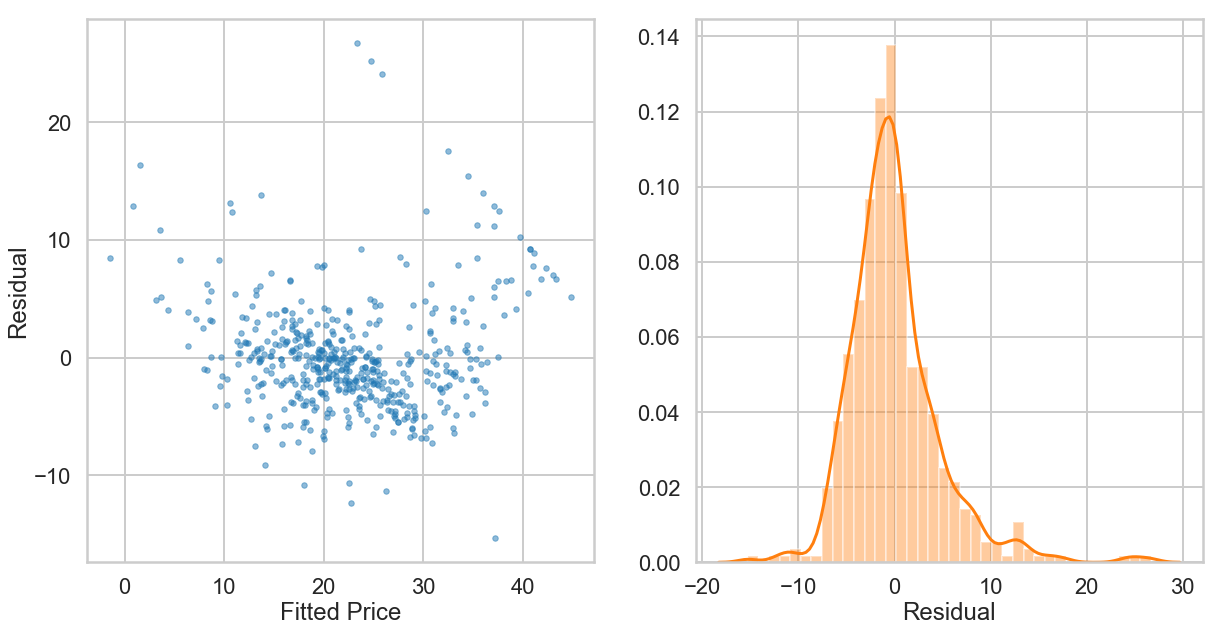

In [48]:
figures, axes = plt.subplots(1, 2, figsize=(20,10))
sns.regplot(x=m_all.fittedvalues, y=m_all.resid, fit_reg=False, scatter_kws={"alpha":0.5, "s":30}, ax=axes[0])
axes[0].set_xlabel("Fitted Price")
axes[0].set_ylabel("Residual")
sns.distplot(m_all.resid, ax=axes[1])
axes[1].set_xlabel("Residual")
axes[1].set_label("Residual Histogram")


# <font color="blue">Analysis</font>
* Fitted values vs Residual - most concentrateed cluster of residuals for fitted values center slightly below 0. This generally means that our fitted prices are generally higher than the actual price since  residual = expected - predicted. Dot above 0 means that predicted is less than actual
    * If the model is a really good fit, we should see cluster of values evently distributed above and below the 0 horizontal line at 0 for residual. However, we see dots way above 0 from 0 to 10 (fitted price), then cluster of dot below 0 from 10 to 30, and the dots seem to move above 0 from 20 to 40 suggesting that model may not be a linear function
* You also see this in our residual graph on the right. The mean is slightly left of 0 indicating that we are generally over estimating price and it's not quite normally distributed since the graph skews to the right

# Quantile Plot

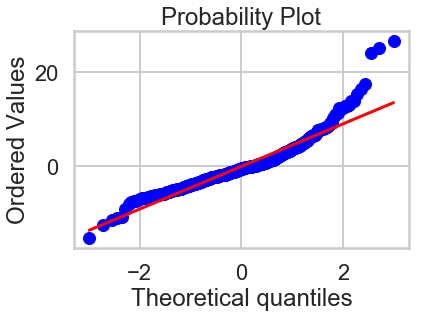

In [49]:
from scipy import stats
# Quantile plot
res = stats.probplot(m_all.resid, dist="norm", plot=plt)

# <font color="blue">Analysis</font>
* <b>What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</b>
    * fitted vs residual - does tell us anything about distribution of thee residuals but it does generally tell us how our estimates are for predictions and what the general error is with our predictions
    * quantile plot - tell us whether the distribution for a data point is normally distributed or not
* <b>Identify any outliers (if any) in your model and write a story describing what these outliers might represent</b>
    * We definitely see outliers in both graphs
        * Fitted vs residual - we see that there are points at the top of the graph between 20 to 50. These generally indicate that for those houses, our error is high and we are under predicting the price. This is consistent with what we saw when comparing histogram of real price and predicted prices. We generally saw that around that rage, our predicted prices are lower than the actual price. Also, when looking at the actual price histogram, we saw theere wer outliers around 45 where there was an abnormally high number of houses at the price. In our predicted model, we do not see that and our predicted model looks generally normal. This is also shows in the quantile graph where we see the blue dots start curving away from red line as the last quantile, meaning that our estimates for that quantile starts to become less accurate 

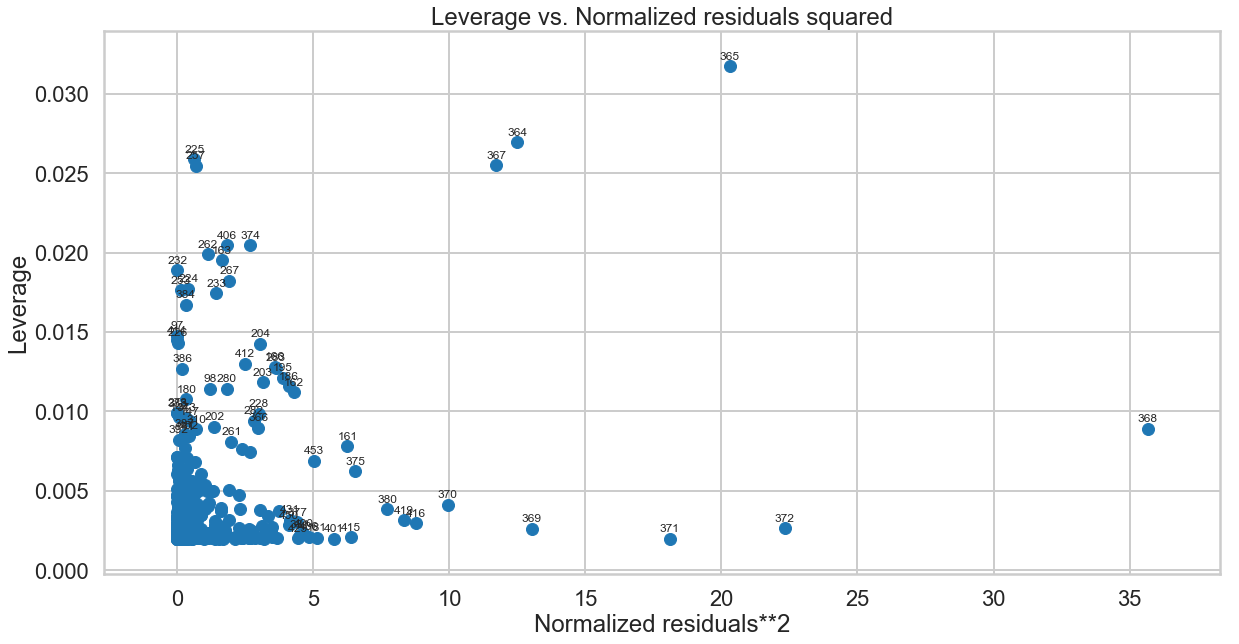

In [50]:
# Construct a leverage plot and identify high leverage points in the model. 
# Write a story explaining possible reasons for the high leverage points.
from statsmodels.graphics.regressionplots import plot_leverage_resid2 
f, ax = plt.subplots(figsize=(20, 10))
figure = plot_leverage_resid2(m, ax=ax)



In [51]:
# let's look at the data points for the outliers
outlier_index = [225, 287, 367, 364, 365, 369, 371, 372, 368]
print(m_all.summary())
print(bos.describe())
print("\noutliers")
print(bos.iloc[outlier_index])

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 09 May 2019   Prob (F-statistic):          1.23e-133
Time:                        22:07:53   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3797      5.143      6.879      0.0

# <font color="blue"> Analysis</font>
We are seeing outliers with the following index:
[ 369, 371, 372, 368, 365, 367, 364, 285, 225, 287 ]

# write story about explaining possible reasons for high leverage points
From looking at summary from statsmodel, the most influencial variable is NOX (1st), CHAS (2nd), and DIS (3rd). Let's look at these and see if we can find a pattern
* If you look at the right outliers, all but index 225, 287 have value of above .624 which is the 75th percentile of the value NOX
* no conclusive data can be drawn from CHAS since values are 0 and 1, I don't see a pattern here. If you look at 369 and 368 one has 0 and the other has 1 - both pretty far from lower left cluster
* DIS for all outliers except for indexes 225, 287 have valuees lower than the 25th percentile (2.100175)
* Indexes 225, 287 and seem to be different than the others outliers. For this we will look at the next couple significant variables: LSTAT, PTRATIO. As you see from below, most variables that can be deciphered have pretty extreme values as well thus accounting for reasons they may be outliers in our regression
    * 287
        * DIS way above 75th percentile
        * NOX around 50th percentile
        * PTRATIO - below 25th precentile 
        * LSTAT - slightly above 25th precentile
    * 225
        * DIS is somewhere between 25th and 50th percentile
        * NOX around 25th percentile
        * PTRATIO - around 25th precentile
        * LSTAT - way below the 25th percentile
        


In [52]:
# Remove the outliers and high leverage points from your model and run the regression again. 
# How do the results change?

# removing outliers from above but keep all variables
bos_nooutliers = bos.drop(index=outlier_index, axis=0)
m_nooutliers = ols("PRICE ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", 
                   bos_nooutliers).fit()
print("\nStats with Outliers:")
print(m_all.summary())
print("\n\nStats without Outliers:")
m_nooutliers.summary()



Stats with Outliers:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 09 May 2019   Prob (F-statistic):          1.23e-133
Time:                        22:07:53   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3797      5.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 09 May 2019   Prob (F-statistic):          1.62e-161
Time:                        22:07:53   Log-Likelihood:                -1386.2
No. Observations:                 497   AIC:                             2798.
Df Residuals:                     484   BIC:                             2853.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1953      4.622      3.720      0.000       8.113      26.278
ZN             0.0274      0.012      2.364      0.018       0.005       0.050
INDUS          0.0361      0.052      0.698      0.485      -0.066       0.138
CHAS           2.1965      0.753      2.916      0.004       0.716       3.677
NOX          -12.3151      3.233     -3.809      0.000     -18.667      -5.963
RM             5.9037      0.403     14.660      0.000       5.112       6.695
AGE           -0.0294      0.011     -2.591      0.010      -0.052      -0.007
DIS           -1.1297      0.168     -6.740      0.000      -1.459      -0.800
RAD            0.1456      0.054      2.678      0.008       0.039       0.252
TAX           -0.0119      0.003     -3.766      0.000      -0.018      -0.006
PTRATIO       -0.8941      0.111     -8.087      0.000      -1.111      -0.677
B              0.0112      0.002      4.967      0.000       0.007       0.016
LSTAT         -0.3013      0.047     -6.471      0.000      -0.393      -0.210
==============================================================================
Omnibus:                       80.797   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.072
Skew:                           0.850   Prob(JB):                     2.39e-41
Kurtosis:                       5.478   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

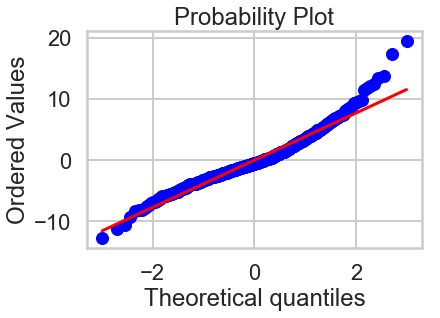

In [53]:
res = stats.probplot(m_nooutliers.resid, dist="norm", plot=plt)

Text(0.5, 1.0, 'Predicted vs Actual')

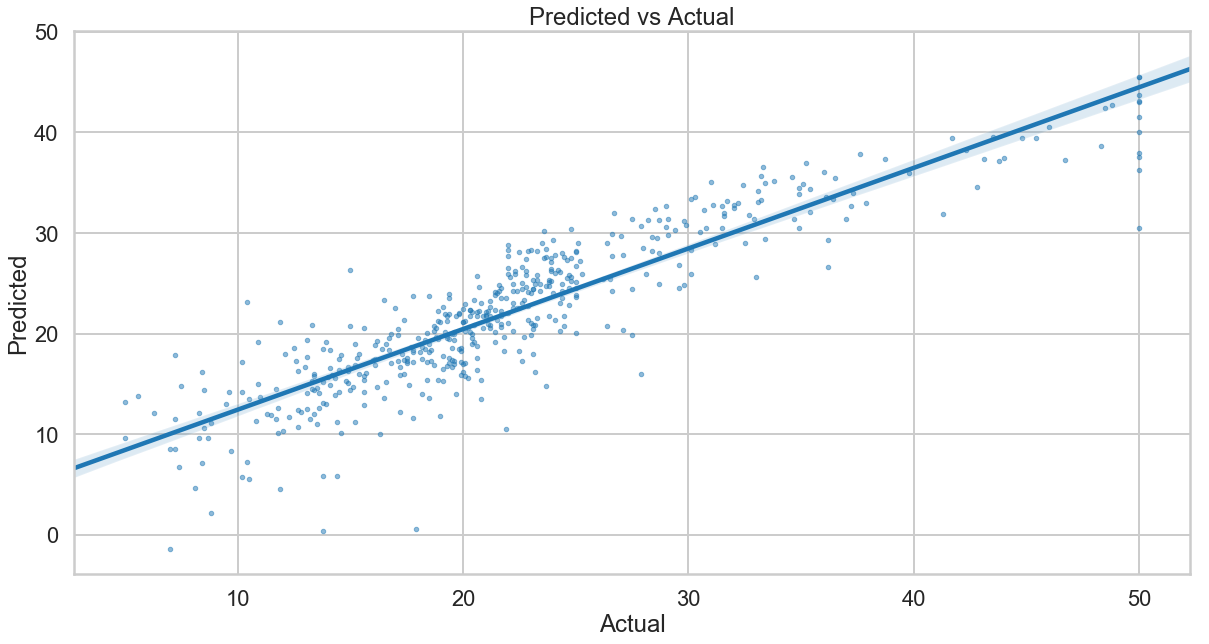

In [54]:
# price vs predicted price
f, axes = plt.subplots(figsize=(20, 10))
sns.regplot(bos_nooutliers.PRICE, m_nooutliers.fittedvalues, scatter_kws={"s": 20, "alpha": 0.5})
axes.set_ylabel("Predicted")
axes.set_xlabel("Actual")
axes.set_title("Predicted vs Actual")



Text(0.5, 1.0, 'Residual Histogram')

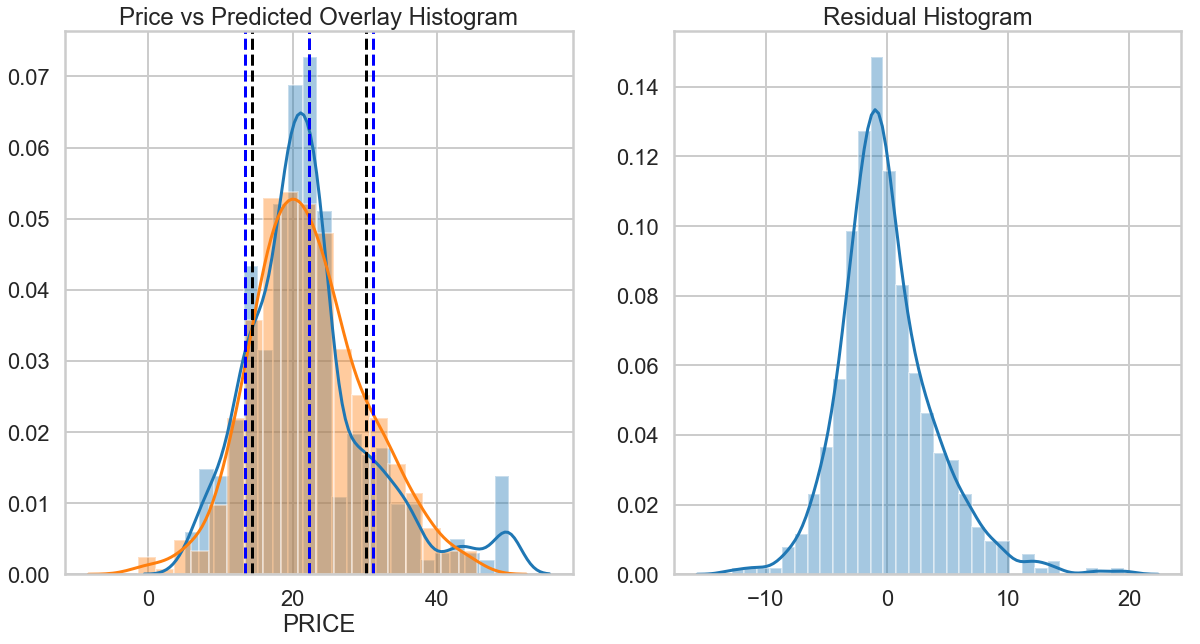

In [55]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(bos_nooutliers.PRICE, ax=ax[0], label="Actual")
sns.distplot(m_nooutliers.fittedvalues, ax=ax[0], label="Predicted")
ax[0].set_title("Price vs Predicted Overlay Histogram")
ax[0].axvline(m_nooutliers.fittedvalues.mean() - m_nooutliers.fittedvalues.std(), color="k", linestyle="--")
ax[0].axvline(m_nooutliers.fittedvalues.mean(), color="k", linestyle="--")
ax[0].axvline(m_nooutliers.fittedvalues.mean() + m_nooutliers.fittedvalues.std(), color="k", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean() - bos_nooutliers.PRICE.std(), color="b", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean(), color="b", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean() + bos_nooutliers.PRICE.std(), color="b", linestyle="--")


sns.distplot(m_nooutliers.resid, ax=ax[1])
ax[1].set_title("Residual Histogram")


In [56]:
print(f'RSS - with outliers {calculate_RSS(m_all.fittedvalues, bos.PRICE)}')
print(f'RSS - without outliers {calculate_RSS(m_nooutliers.fittedvalues, bos_nooutliers.PRICE)}')
print(f'ESS - with outliers {calculate_ESS(m_all.fittedvalues, bos.PRICE)}')
print(f'ESS - without outliers {calculate_ESS(m_nooutliers.fittedvalues, bos_nooutliers.PRICE)}')


RSS - with outliers 11322.004277134596
RSS - without outliers 7699.738397590267
ESS - with outliers 31394.2911378852
ESS - without outliers 31177.392990739907


# <font color="blue">Analysis</font>

| Variables | F-Statistic | p-value of F-Statistic | AIC |
|-----------|-------------|------------------------|-----|
| 1 - RM | 471 | 2.49e-74 | 3350 |
| 5 | 155.4 | 2.28e-99 | 3218 |
| 13 | 113.9 | 1.23e-133 | 3035 |

* F-statistics actually increased from 114 to 164. However, exponent for p-value of F-stat decreased from -133 to -161 indicating the chance for null hypothesis has been further decreased
    * RSS have decreased significantly
    * ESS has decreased although not sure if this is significant
* R^2 increased from 73.5% to 80.3% which means our variables describe change in variance and variation of price slightly better than before
* AIC decreased ~3035 to 2792 which means our fit is better
* We are definitely seeing less outliers in our scatterplot but we are still seeing ceiling effect around 50k in our predictions. Although this is smaller now
* First standard deviation of predicted values is slightly larger than the original price model as you can see from histogram
* our model is still predicting prices below 0
* We are still under predicting within the first standard deviation of the mean and at the high range but generally over-predicting prices as you can see from residual histogram
* INDUS and AGE were not statistically significant before we removed outliers. INDUS is still not statistically significant but now AGE is significant. CHAS has now changed to borderline being statistically insignificant.

In [57]:
# let's run the modle without INDUS and ZN
m_noinduszn = ols("PRICE ~ ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + AGE", 
                   bos_nooutliers).fit()
m_noinduszn.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     178.3
Date:                Thu, 09 May 2019   Prob (F-statistic):          1.51e-162
Time:                        22:07:54   Log-Likelihood:                -1386.4
No. Observations:                 497   AIC:                             2797.
Df Residuals:                     485   BIC:                             2847.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0345      4.614      3.692      0.000       7.968      26.101
ZN             0.0265      0.012      2.303      0.022       0.004       0.049
CHAS           2.2505      0.749      3.005      0.003       0.779       3.722
NOX          -11.7165      3.116     -3.761      0.000     -17.838      -5.595
RM             5.8795      0.401     14.662      0.000       5.092       6.667
DIS           -1.1542      0.164     -7.045      0.000      -1.476      -0.832
RAD            0.1344      0.052      2.588      0.010       0.032       0.236
TAX           -0.0110      0.003     -3.851      0.000      -0.017      -0.005
PTRATIO       -0.8840      0.110     -8.069      0.000      -1.099      -0.669
B              0.0112      0.002      4.950      0.000       0.007       0.016
LSTAT         -0.2994      0.046     -6.444      0.000      -0.391      -0.208
AGE           -0.0293      0.011     -2.591      0.010      -0.052      -0.007
==============================================================================
Omnibus:                       81.211   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.529
Skew:                           0.851   Prob(JB):                     6.99e-42
Kurtosis:                       5.500   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# <font color="blue">Analysis</font>
* Overall.. not significant results here
* As suspected ${R^2}$ stays the same - no change in our ability to discribe variance and variation in prices
* F-statistics increased from 163 to 179. p-value for F-stat is lower by factor of 10 which mean change for null hypothesis is decreased slightly again
* AIC decreased slightly to decreased by 2 which means our fit is slightly better
* effect all other variables are all statistically significant. CAHS which was borderline being not-significan is now way below the 5% watermark

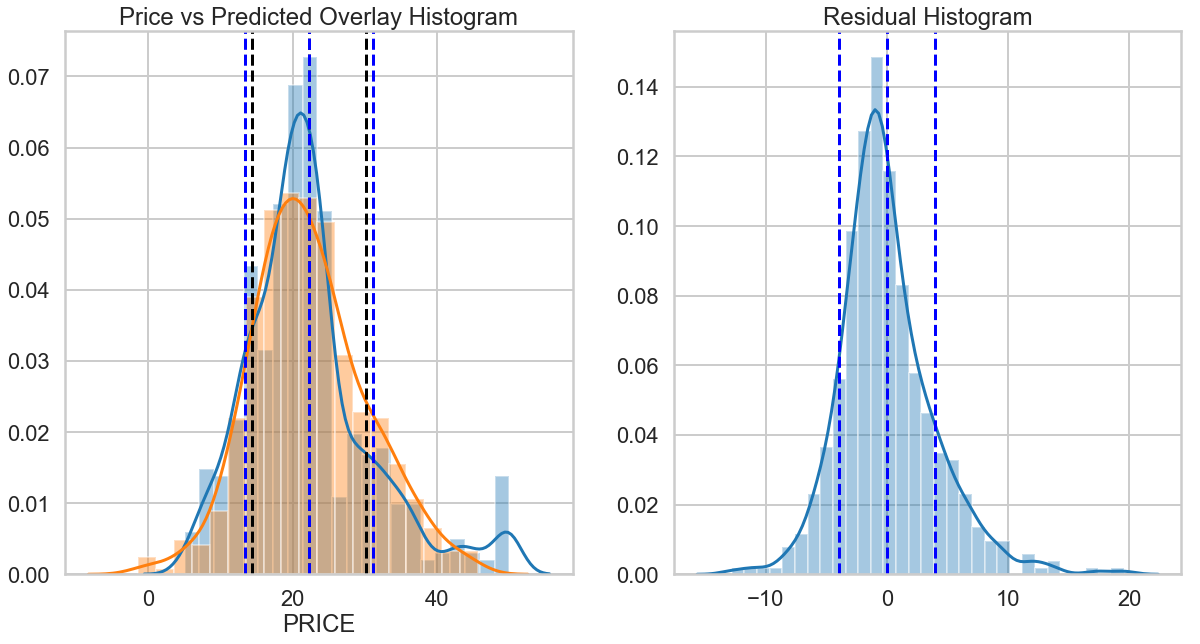

In [60]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(bos_nooutliers.PRICE, ax=ax[0], label="Actual")
sns.distplot(m_noinduszn.fittedvalues, ax=ax[0], label="Predicted")
ax[0].set_title("Price vs Predicted Overlay Histogram")
ax[0].axvline(m_noinduszn.fittedvalues.mean() - m_noinduszn.fittedvalues.std(), color="k", linestyle="--")
ax[0].axvline(m_noinduszn.fittedvalues.mean(), color="k", linestyle="--")
ax[0].axvline(m_noinduszn.fittedvalues.mean() + m_noinduszn.fittedvalues.std(), color="k", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean() - bos_nooutliers.PRICE.std(), color="b", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean(), color="b", linestyle="--")
ax[0].axvline(bos_nooutliers.PRICE.mean() + bos_nooutliers.PRICE.std(), color="b", linestyle="--")


sns.distplot(m_nooutliers.resid, ax=ax[1])
ax[1].set_title("Residual Histogram")
ax[1].axvline(m_nooutliers.resid.mean() - m_nooutliers.resid.std(), color="b", linestyle="--")
ax[1].axvline(m_nooutliers.resid.mean(), color="b", linestyle="--")
ax[1].axvline(m_nooutliers.resid.mean() + m_nooutliers.resid.std(), color="b", linestyle="--")


# <font color="blue">Analysis</font>
* the new prediction model still has wider standard deviation than the true price model.
* we are still predicting negative prices which is not good
* residual histogram shows that mean is at 0 which is good - this mean that if we look at all predictions we are not over-predicting or under-predicting